In [ ]:
# create a directory names model and enter that directory
%mkdir model/
%cd model

# load the pre-trained model and weights
!wget https://raw.githubusercontent.com/georgiosouzounis/face-detection-ssd-caffe/main/model/deploy.prototxt.txt

!wget https://github.com/georgiosouzounis/face-detection-ssd-caffe/raw/main/model/res10_300x300_ssd_iter_140000.caffemodel

# move out of the directory once the model is loaded
%cd ../

mkdir: cannot create directory ‘model/’: File exists
/content/model
--2023-09-21 14:42:01--  https://raw.githubusercontent.com/georgiosouzounis/face-detection-ssd-caffe/main/model/deploy.prototxt.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28092 (27K) [text/plain]
Saving to: ‘deploy.prototxt.txt.5’

deploy.prototxt.txt 100%[===================>]  27.43K  --.-KB/s    in 0.002s  

2023-09-21 14:42:01 (17.1 MB/s) - ‘deploy.prototxt.txt.5’ saved [28092/28092]

--2023-09-21 14:42:01--  https://github.com/georgiosouzounis/face-detection-ssd-caffe/raw/main/model/res10_300x300_ssd_iter_140000.caffemodel
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting respo

In [ ]:
# import the relevant libraries
import numpy as np
import cv2 # openCV

# check the opencv version
if cv2.__version__ < '4.5.2':
  print("opencv version: ", cv2.__version__)
  print("please upgrade your opencv installation to the latest")

# if the openCV version is < 4.4.0 update to the latest otherwise skip this step
!pip install opencv-python==4.5.2.52

ERROR: Could not find a version that satisfies the requirement opencv-python==4.5.2.52 (from versions: 3.4.0.14, 3.4.10.37, 3.4.11.39, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.15.55, 3.4.16.57, 3.4.16.59, 3.4.17.61, 3.4.17.63, 3.4.18.65, 4.3.0.38, 4.4.0.40, 4.4.0.42, 4.4.0.44, 4.4.0.46, 4.5.1.48, 4.5.3.56, 4.5.4.58, 4.5.4.60, 4.5.5.62, 4.5.5.64, 4.6.0.66, 4.7.0.68, 4.7.0.72, 4.8.0.74, 4.8.0.76)
ERROR: No matching distribution found for opencv-python==4.5.2.52


In [ ]:
# load the serialized model from the local copy in model/
model_cfg = "model/deploy.prototxt.txt"
model_weights = "model/res10_300x300_ssd_iter_140000.caffemodel"

# read the model
detector = cv2.dnn.readNetFromCaffe(model_cfg, model_weights)

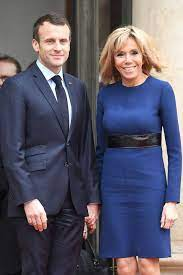

In [ ]:
# Upload the test image provided into your drive and copy the path
#%cp /content/drive/MyDrive/macron.jpeg .

test_img = "/content/model/images2.jpeg"

#from google.colab import drive
#drive.mount('/content/model/macron.jpeg')

# load the test image and create an image blob
image = cv2.imread(test_img)
(h, w) = image.shape[:2]

# display the image
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [ ]:
# set the intensity scaling factor; 1 in this case, i.e. original image intensities
scalefactor = 1.0

# set the new dimensions for image resizing to match the network requirements
new_size = (300, 300)

# create a blob using OpenCV's DNN functionality and by performing mean subtraction
# to normalize the input
blob = cv2.dnn.blobFromImage(image, scalefactor, new_size, (127.5, 127.5, 127.5), swapRB=True, crop=False)

# set the blob as input to the network
detector.setInput(blob)
# compute the forward pass - detect faces if any
detections = detector.forward()
detections.shape

(1, 1, 200, 7)

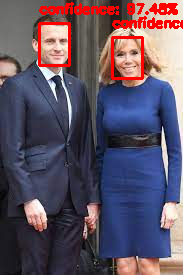

In [ ]:
# Declare an array
detections[0][0][0]

# compute the length of the array
len(detections[0][0])

# set the confidence threshold
confidence_threshold = 0.5

# loop over the detections
for i in range(0, detections.shape[2]):
  # extract the confidence (i.e., probability) associated with the prediction
  confidence = detections[0, 0, i, 2]
  # ignore weak detections
  if confidence > confidence_threshold:
    # compute the (x, y)-coordinates of the bounding box for the detected object
    box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
    (startX, startY, endX, endY) = box.astype("int")
    # draw the bounding box of the detected face
    cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
    # print the probability of this detection
    text = "confidence: {:.2f}%".format(confidence * 100)
    y = startY - 10 if startY - 10 > 10 else startY + 10
    cv2.putText(image, text, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)

# show the output image
cv2_imshow(image)